# BEATS TDR Chapter 07f: Pink beam flux for Phase Contrast Imaging

Comparison of the expected flux of BEATS for Phase-Contrast experiments using pink beam with the flux of SYRMEP@Elettra 
______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   18/05/2020

Last update:  24/06/2020
______________________________________________________


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy as sc
from scipy import constants
from pandas_ods_reader import read_ods
from matplotlib.ticker import ScalarFormatter
import h5py

In [2]:
%matplotlib inline
font = {'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

## Filtered white beam flux for Phase Contrast Imaging (PCI) from the Science Case

Comparison with two studies from the science case done at Elettra with filtered white beam PCI.
The BEATS 3PW flux file from a XOP simulation is available as .CSV ('BEATS_BL_Flux_1mrad.csv')

In [3]:
# read CSV file with shadow results
names = ['E', 'E0', 'E1', 'I', 'n']
Flux1mrad_filecsv = 'Oasys/BEATS_BL_Flux_1mrad.csv'
Flux1mrad = pd.read_csv(Flux1mrad_filecsv, sep=',', names=names, skiprows=[0, 1, 2, 3, 4, 5])

In [5]:
# read 3PW flux from XOP
fluxdata = pd.read_csv('Oasys/3PW_flux.csv', sep=',', names=['E', 'F'], skiprows=[0])
F_source = np.array([fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][0]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][1]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][2]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][3]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][4]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][5]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][6]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][7]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][8]-fluxdata['E']))],
                     fluxdata['F'][np.argmin(np.abs(Flux1mrad['E'][9]-fluxdata['E']))]])

In [6]:
# Flux in 1mrad = Flux_XOP * (n. good rays / Tot. rays)
Flux_1mrad = F_source*Flux1mrad['I']/Flux1mrad['n']

#### Elettra Bending magnet Flux in 1mrad and 0.1%BW
Eq. 5.8 in:
Attwood, David. 1999. “Soft X-Rays and Extreme Ultraviolet Radiation: Principles and Applications.” Cambridge Core. Cambridge University Press. August 1999. https://doi.org/10.1017/CBO9781139164429.

In [7]:
# Load tabulated values for G1
Tab5_2 = pd.read_csv('Table5.2.csv', sep=',', names=['y', 'G1', 'H2'], skiprows=[0])

In [8]:
Elettra_E = 2.4 # [GeV]
Elettra_I = 0.31 # [A]
Elettra_T = 1.45 # [T]

# Flux in 1mrad and 0.1%BW
F_SYRMEP = 2.46e13*Elettra_E*Elettra_I*Tab5_2['G1']

# Energy array
En_SYRMEP = 1e3*(0.665*Elettra_E**2*Elettra_T)*Tab5_2['y']

In [9]:
SESAME_E = 2.5 # [GeV]
SESAME_I = 0.250 # [A]
BEATS_T = 3.0 # [T]

# Flux in 1mrad and 0.1%BW
F_BEATS = 2.46e13*SESAME_E*SESAME_I*Tab5_2['G1']

# Energy array
En_BEATS = 1e3*(0.665*SESAME_E**2*BEATS_T)*Tab5_2['y']

Text(0, 0.5, 'Flux [Ph/s/mrad (0.1%BW)')

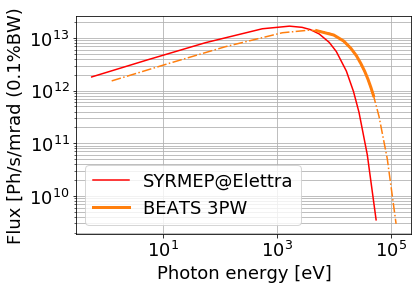

In [10]:
# Flux in 1mrad plot
f, ax = plt.subplots()

plt.plot(En_SYRMEP, F_SYRMEP, 'r')
plt.plot(Flux1mrad['E'], Flux_1mrad, 'C1', linewidth=3)
plt.plot(En_BEATS, F_BEATS, '-.C1')
plt.legend(['SYRMEP@Elettra', 'BEATS 3PW'], loc='lower left')

plt.grid(True, which="both")
ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel('Photon energy [eV]')
plt.ylabel('Flux [Ph/s/mrad (0.1%BW)')

## Transmissivity data for some filters - XOP data

Transmissivity files were calculated with the Power widget in XOP and for different filter settings:
- Al [0.1, 0.2, 0.5, 1.0] [mm]
- Cu [10, 20, 50] [um]
- Fe [10, 50] [um]
- Pd [75 um]
- Graphite [5, 20] [mm]
- Diamond [0.7 mm]
- Air [1 m]

In [11]:
filters=['E', '100umAl', '200umAl', '500umAl', '1mmAl', '10umCu', '20umCu', '50umCu', '10umFe', '50umFe', '75umPd', '5mmGraphite', '20mmGraphite', '700umCVD', '1mAir', '1.5mmSi', '25umMo']

In [12]:
# read CSV trasnmissivity file
transmissivity = pd.read_csv('Oasys/transmissivity_BEATS_filters.csv', sep=',', names=filters, skiprows=[0])

In [13]:
# Sample transmissivity data @ the energies used for the plots above
T_data_BEATS = np.zeros((Flux1mrad.shape[0],transmissivity.shape[1]),dtype=np.float)
for i in range(0,Flux1mrad.shape[0]):
    T_data_BEATS[i,:] = transmissivity.loc[np.argmin(np.abs(float(Flux1mrad['E'][i])-transmissivity['E']))]
    
T_data_BEATS2 = np.zeros((F_BEATS.shape[0],transmissivity.shape[1]),dtype=np.float)
for i in range(0,F_BEATS.shape[0]):
    T_data_BEATS2[i,:] = transmissivity.loc[np.argmin(np.abs(float(En_BEATS[i])-transmissivity['E']))]
        
T_data_SYRMEP = np.zeros((F_SYRMEP.shape[0],transmissivity.shape[1]),dtype=np.float)
for i in range(0,F_SYRMEP.shape[0]):
    T_data_SYRMEP[i,:] = transmissivity.loc[np.argmin(np.abs(float(En_SYRMEP[i])-transmissivity['E']))]

### Plots of the FILTERED pink beam flux

In [14]:
T_CVD = T_data_BEATS[:,13] # Transmissivity of 0.7 mm thick CVD diamond window

#### 3D-cell distribution in tissues of a developing salamander limb
Tesařová, Markéta, Lucia Mancini, Andras Simon, Igor Adameyko, Markéta Kaucká, Ahmed Elewa, Gabriele Lanzafame, et al. 2018. “A Quantitative Analysis of 3D-Cell Distribution in Regenerative Muscle-Skeletal System with Synchrotron X-Ray Computed Microtomography.” Scientific Reports 8 (1): 1–12. https://doi.org/10.1038/s41598-018-32459-2.

#### Synchrotron X-ray μCT measurements:
Phase-contrast synchrotron X-ray μCT measurements were
performed at the SYRMEP beamline of the Italian synchrotron radiation facility Elettra with the white beam
mode. The X-ray spectrum of the beam was filtered with 1.5 mm of silicon and 0.025 mm of molybdenum.

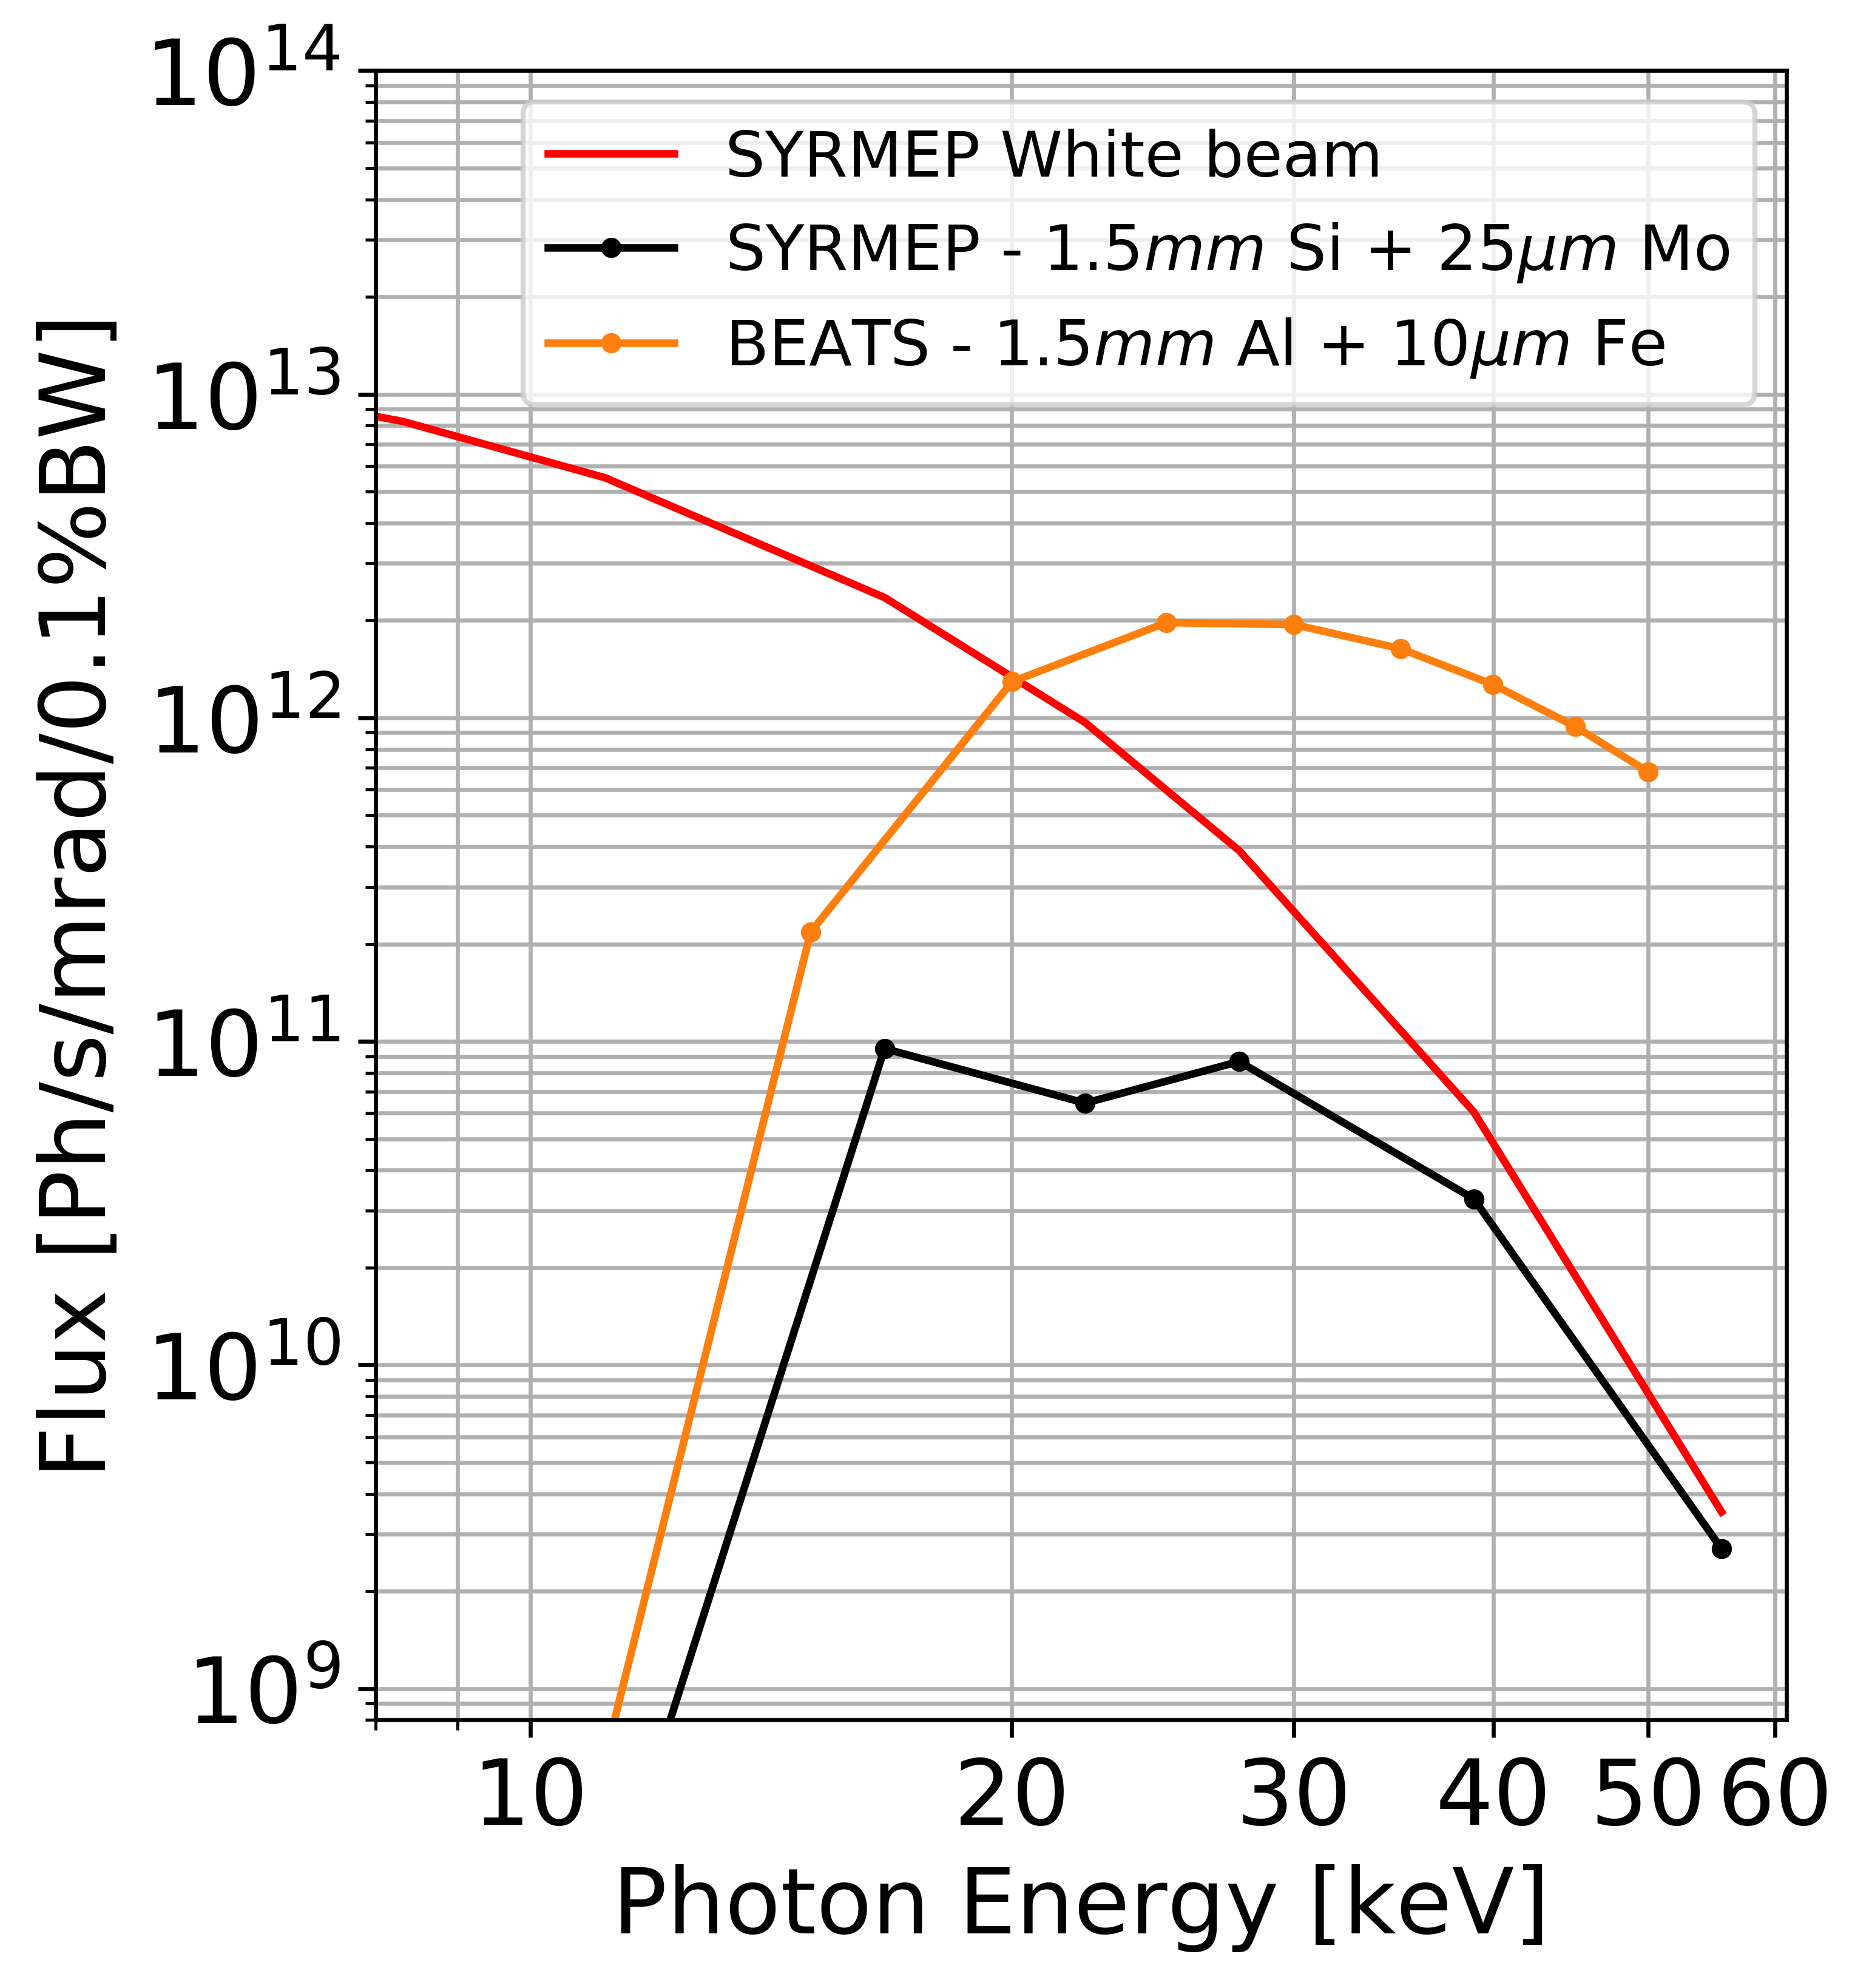

In [24]:
# SYRMEP pink beam for this study 
f, ax = plt.subplots(figsize=(5,6), dpi=600)
plt.plot(1e-3*T_data_SYRMEP[:,0], F_SYRMEP, 'r')
# plt.plot(1e-3*T_data_SYRMEP[:,0], F_SYRMEP*T_data_SYRMEP[:,15], '--k')
plt.plot(1e-3*T_data_SYRMEP[:,0], F_SYRMEP*T_data_SYRMEP[:,16]*T_data_SYRMEP[:,15], '.-k')

# plt.plot(1e-3*T_data_BEATS[:,0], Flux_1mrad*T_data_BEATS[:,4]*T_data_BEATS[:,6]*T_data_BEATS[:,3], ':k')
# plt.plot(1e-3*T_data_BEATS[:,0], Flux_1mrad, 'b')
plt.plot(1e-3*T_data_BEATS[:,0], Flux_1mrad*T_data_BEATS[:,3]*T_data_BEATS[:,4]*T_data_BEATS[:,8], '.-C1')
# plt.plot(1e-3*T_data_BEATS2[:,0], F_BEATS*T_data_BEATS2[:,3]*T_data_BEATS2[:,4]*T_data_BEATS2[:,8], ':C1')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set(xlim=(8, 61), ylim=(0.8e9, 1e14))
plt.xticks(np.arange(10, 70, 10))
ax.xaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Flux [Ph/s/mrad/0.1%BW]')
plt.grid(True, which="both")
# 'SYRMEP - 1.5 $mm$ Si',
plt.legend(['SYRMEP White beam', 'SYRMEP - 1.5$mm$ Si + 25$\mu m$ Mo', 'BEATS - 1.5$mm$ Al + 10$\mu m$ Fe'], loc='upper right', fontsize="x-small")
f.savefig("BEATS_PinkBeam_flux_PCI.png", bbox_inches='tight', dpi=600)